# Исследование данных о компьютерных играх

***Описание проекта***

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

***Описание данных***

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Обзор данных

Импоритруем библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from scipy import stats as st

Считываем файл:

In [2]:
data = pd.read_csv('/datasets/games.csv')

Выводим первые 10 строк и общую информацию по таблице:

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


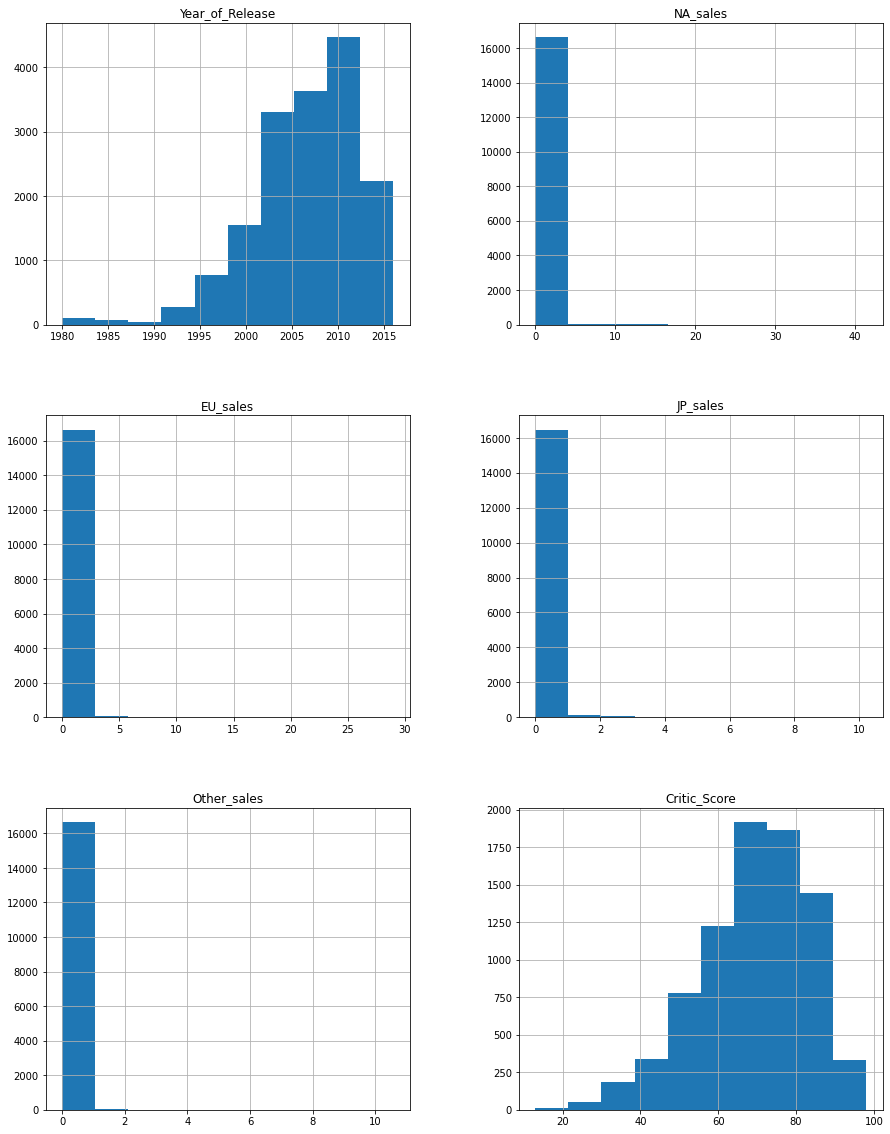

In [5]:
data.hist(figsize=(15, 20));

***Вывод:*** 

В нескольких столбцах присутствуют пропущенные значения.

Названия столбцов имеют как нижний, так и верхний регистр.

Существует несоответствие типов данных с фактическими.

Более подробно разберем и исправим в шаге предобработки данных.

## Предобработка данных

### Корректировка названий столбцов

Приведем все названия к нижнему регистру:

In [6]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

In [7]:
data['year_of_release'] = data['year_of_release'].astype('Int16')
data['critic_score'] = data['critic_score'].astype('float')
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float64')

***Вывод:*** 

Столбец 'year_of_release' содержит года, поэтому изменили формат на дату.

Столбец 'critic_score' имеет болько целые числа, тип object сменили на int

Столбец 'user_score' включает в себя дробные числа, изменили на float. При приведения к типу данных обнаружилось значение 'tbd', по данным из интернета это сокращение, которое переводится как "Будет определено позднее". Делаем вывод, чтоо оценки еще нет, а что будет неизвестно, поэтому сменили на NaN.

### Работа с пропусками

Посмотрим на количество пропусков по столбцам:

In [8]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [9]:
data.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [10]:
data.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Есть по два пропуска в столбцах и названием и жанром, причем в один строках. Данные заменить нечем, удалим строки.

In [11]:
data.dropna(subset = ['name'], inplace = True)

Удаляем строки с пропусками в годе релиза.

In [12]:
data.dropna(subset = ['year_of_release'], inplace = True)

Остальные пропуски оставим незаполненными, к сожалению нет возможности выявить какие данные должны быть в столбцах. Достаточно много строк с пропусками в столбцах с оценкой и рейтингом, этому могли поспособствовать как баги системы, так и отсутствие информации. Мы имеем данные даже за прошлый век, думаю, тогда и не было возможности поставить оценку на каком-либо интернет-ресурсе.

### Подсчет продаж

Добавим новый столбец с суммарными продажами по регионам:

In [13]:
data['sum_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


In [14]:
# На всякий случай проверю наличие явных дубликатов
data.duplicated().sum()

0

In [15]:
data[data.duplicated(['name', 'year_of_release', 'genre', 'platform'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16230,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E,0.01


In [16]:
data[data.duplicated(['name', 'year_of_release', 'genre', 'platform'], keep='last')]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56


Нашли один дубликат, имеет смысл сохранить 604 строку, так как имеет больше данных.

In [17]:
data = data.drop(index=16230).reset_index(drop=True)

In [18]:
data.query('name == "Madden NFL 13"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
503,Madden NFL 13,X360,2012,Sports,2.53,0.15,0.0,0.17,81.0,5.8,E,2.85
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
3933,Madden NFL 13,Wii,2012,Sports,0.47,0.00,0.0,0.03,NaN,7.3,E,0.50
5800,Madden NFL 13,PSV,2012,Sports,0.28,0.00,0.0,0.02,63.0,7.3,E,0.30
6956,Madden NFL 13,WiiU,2012,Sports,0.21,0.00,0.0,0.02,75.0,6.7,E,0.23


## Исследовательский анализ данных

### Выпуск игр по годам

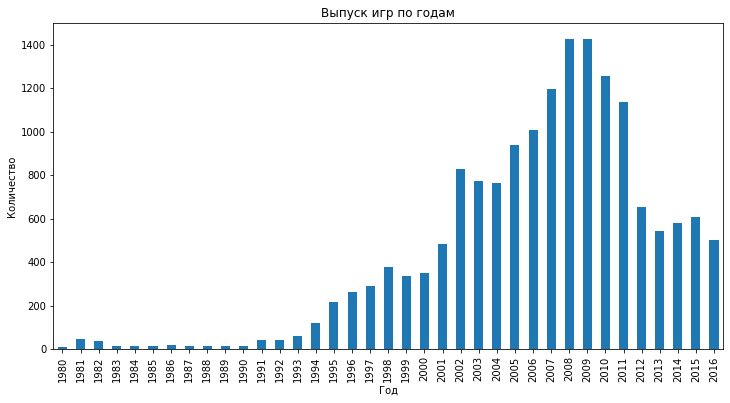

In [19]:
data.groupby(by='year_of_release')['name'].count().plot(kind='bar', 
                                                        figsize=(12, 6),
                                                        title='Выпуск игр по годам');
plt.xlabel('Год')
plt.ylabel('Количество');

***Вывод:*** Наблюдается рост числа игр по мере хода времени. Резкий рост есть в 2002 году. С 2010 начинается постепенное снижение.

### Изменение продаж по платформам.

Необходимо выяснить изменение продаж по платформам, определить платформы с наибольшими продажами и выявить за какой срок появляются новые платформы и исчезают старые. 

Построим сводную таблицу для определения актуального периода:

In [20]:
data.query('year_of_release > 2000').pivot_table(index='platform', columns='year_of_release', 
                                                 values='name', aggfunc='count', fill_value='-')


year_of_release,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,
3DS,-,-,-,-,-,-,-,-,-,-,116.0,93.0,91.0,80.0,86.0,46.0
DC,8.0,1.0,-,-,-,-,1.0,1.0,-,-,-,-,-,-,-,-
DS,-,-,-,23.0,118.0,201.0,376.0,492.0,403.0,323.0,153.0,23.0,8.0,-,-,-
GB,10.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
GBA,107.0,198.0,150.0,175.0,135.0,39.0,6.0,-,-,-,-,-,-,-,-,-
GC,22.0,152.0,144.0,83.0,97.0,40.0,4.0,-,-,-,-,-,-,-,-,-
N64,9.0,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-
PC,15.0,19.0,33.0,30.0,37.0,52.0,62.0,76.0,107.0,90.0,139.0,61.0,38.0,47.0,50.0,54.0
PS,91.0,20.0,3.0,-,-,-,-,-,-,-,-,-,-,-,-,-


Создадим датафрейм с актуальным периодом:

In [21]:
data_act = data.query('year_of_release >= 2012').reset_index(drop=True)

Посмотрим на продажи по платформам:

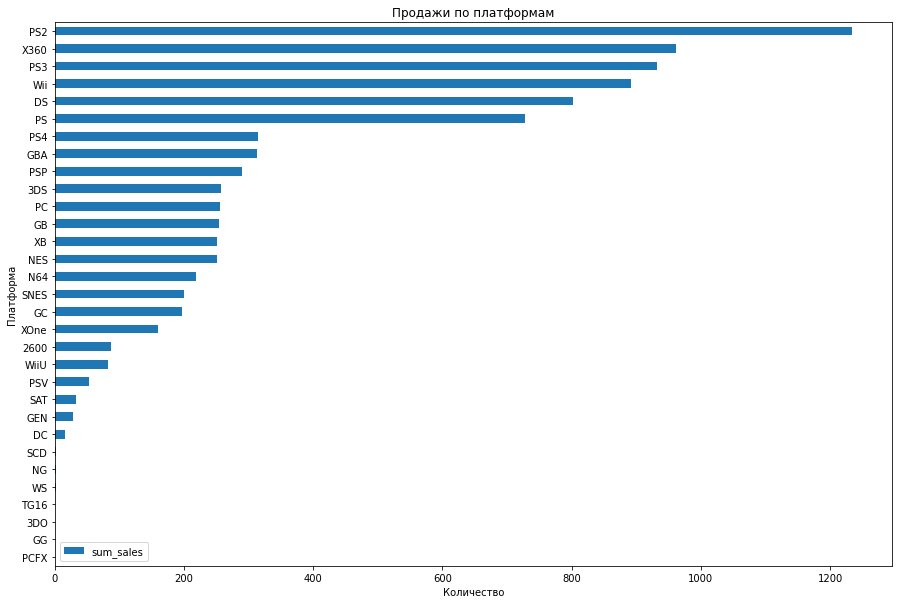

In [22]:
pivot_platform = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
pivot_platform.sort_values(by='sum_sales').plot(kind='barh', figsize=(15, 10), title='Продажи по платформам')
plt.xlabel('Количество')
plt.ylabel('Платформа');

По графику наблюдаем 6 явно лидирующих платформ:

In [23]:
pivot_platform.sort_values(by='sum_sales', ascending=False).head(6)

,sum_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


Так же посомтрим на лидеров за актульнай период:

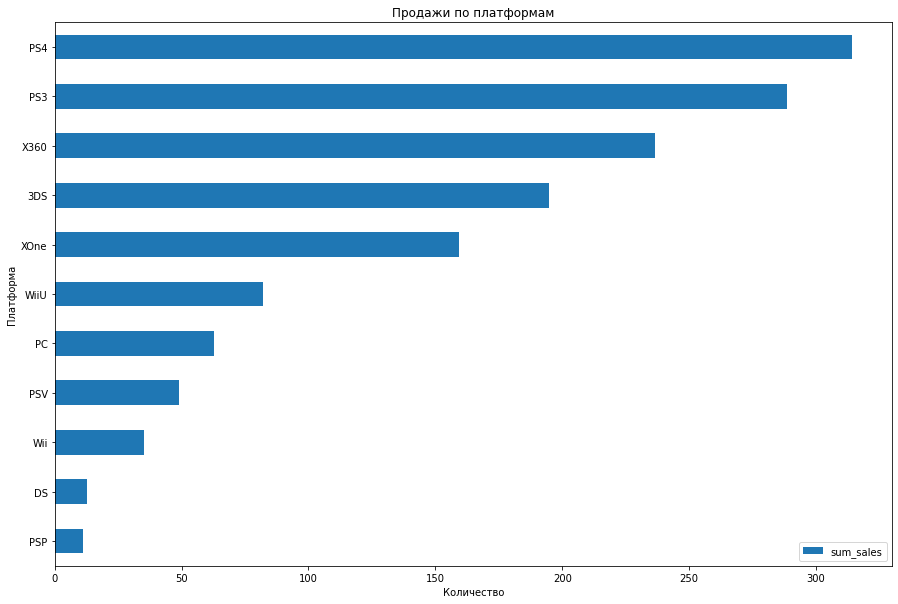

In [24]:
pivot_platform_act = data_act.pivot_table(index='platform', values='sum_sales', aggfunc='sum')
pivot_platform_act.sort_values(by='sum_sales').plot(kind='barh', figsize=(15, 10), title='Продажи по платформам')
plt.xlabel('Количество')
plt.ylabel('Платформа');

Здесь с отрывом идут 5 платформ:

In [25]:
pivot_platform_act.sort_values(by='sum_sales', ascending=False).head(5)

,sum_sales
platform,
PS4,314.14
PS3,288.78
X360,236.54
3DS,194.61
XOne,159.32


***Вывод:*** Лидером по продажам является PS2. За актуальный период для дальнейшего исследования возьмем период с 2013 по текущий год, так как в период в 4 года платформы идут на развитие.

### Лидеры по продажам

Здесь более подробно рассомотрим топ платформ по их продажам:

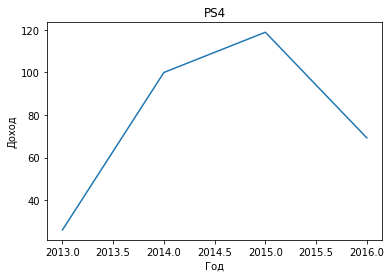

In [26]:
data_act.query('platform == "PS4"').groupby(by='year_of_release')['sum_sales'].sum().plot(kind='line', title='PS4')
plt.xlabel('Год')
plt.ylabel('Доход');

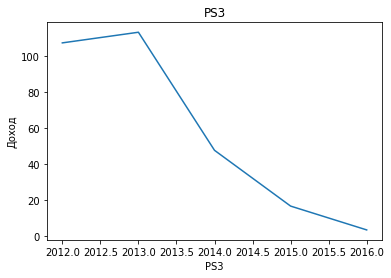

In [27]:
data_act.query('platform == "PS3"').groupby(by='year_of_release')['sum_sales'].sum().plot(kind='line', title='PS3')
plt.xlabel('PS3')
plt.ylabel('Доход');

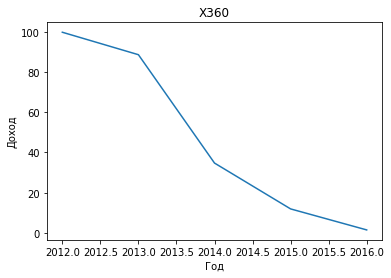

In [28]:
data_act.query('platform == "X360"').groupby(by='year_of_release')['sum_sales'].sum().plot(kind='line', title='X360')
plt.xlabel('Год')
plt.ylabel('Доход');

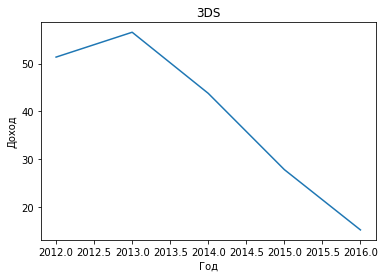

In [29]:
data_act.query('platform == "3DS"').groupby(by='year_of_release')['sum_sales'].sum().plot(kind='line', title='3DS')
plt.xlabel('Год')
plt.ylabel('Доход');

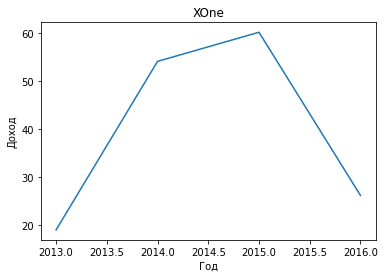

In [30]:
data_act.query('platform == "XOne"').groupby(by='year_of_release')['sum_sales'].sum().plot(kind='line', title='XOne')
plt.xlabel('Год')
plt.ylabel('Доход');

In [31]:
data_act.pivot_table(index='platform', columns='year_of_release', 
                                                 values='sum_sales', aggfunc='sum', fill_value='-')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.36,56.57,43.76,27.78,15.14
DS,11.01,1.54,-,-,-
PC,23.22,12.38,13.28,8.52,5.25
PS3,107.35,113.25,47.76,16.82,3.6
PS4,-,25.99,100.0,118.9,69.25
PSP,7.69,3.14,0.24,0.12,-
PSV,16.19,10.59,11.9,6.25,4.25
Wii,21.71,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.6


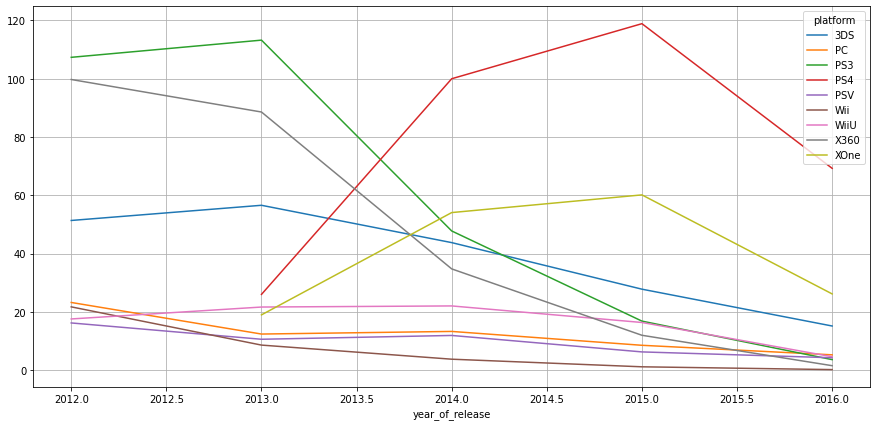

In [32]:
plat = ['DS', 'PSP']
data_act.query('platform != @plat').pivot_table(index='year_of_release', 
                     columns = 'platform', 
                     values='sum_sales', 
                     aggfunc='sum').plot(grid=True, 
                                         figsize=(15, 7))
plt.show()

***Вывод:*** По сумме продаж у всех платформ имеется снижение. Потенциально прибыльной я бы назвал только PS4 и XOne, продажи велики по сравнению с другими платформами, к тому же платформа наиболее актуальная и вероятно еще начнет пользоваться популярностью.

### Глобальные продажи игр по платформам. Диаграмма размаха.

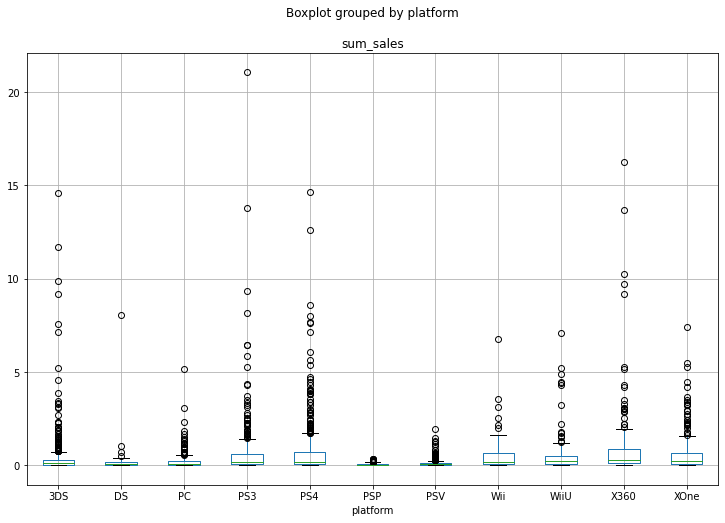

In [33]:
data_act.boxplot(column='sum_sales', by='platform', figsize=(12, 8));

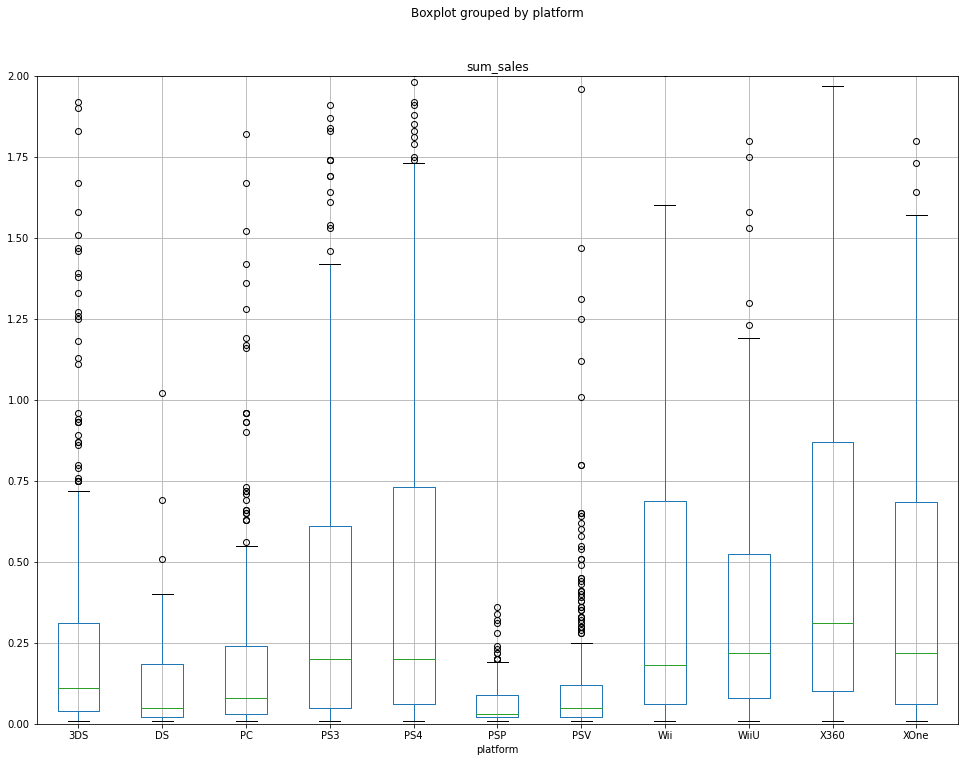

In [34]:
data_act.boxplot(column='sum_sales', by='platform', figsize=(16, 12))
plt.ylim(0, 2);

***Вывод:*** По графику наблюдаем, что успешее всего в продажах PS3, PS4, Wii, X360, XOne. В целом у всех платформ не лучшие реузультаты в продажах, так как так как максимум имеет большее расстояние от Q2, так же медиана расположена внизу коробки. 

### Влияние отзывов на продажи

Рассмотрим влияние на одной из популярных платформ. По общим данным определили, что лучшей по продажам является PS4

Корреляция: -0.031957110204556376


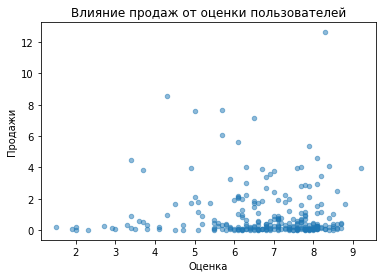

In [35]:
data_ps4 = data_act.query('platform == "PS4"')
data_ps4.plot(y='sum_sales', x='user_score', 
                                         kind='scatter', alpha=0.5, 
                                         title='Влияние продаж от оценки пользователей')
plt.xlabel('Оценка')
plt.ylabel('Продажи');
plt.show
print('Корреляция:', data_ps4['sum_sales'].corr(data_ps4['user_score']))

Корреляция: 0.406567902061781


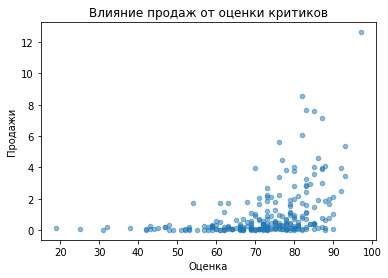

In [36]:
data_ps4 = data_act.query('platform == "PS4"')
data_ps4.plot(y='sum_sales', x='critic_score', 
                                         kind='scatter', alpha=0.5, 
                                         title='Влияние продаж от оценки критиков')
plt.xlabel('Оценка')
plt.ylabel('Продажи');
plt.show
print('Корреляция:', data_ps4['sum_sales'].corr(data_ps4['critic_score']))

Так же посмотрим данные по PS3:

Корреляция: 0.3341517575509856


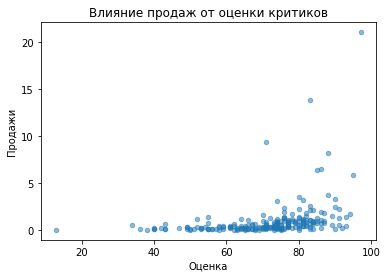

In [37]:
data_ps3 = data_act.query('platform == "PS3"')
data_ps3.plot(y='sum_sales', x='critic_score', 
                                         kind='scatter', alpha=0.5, 
                                         title='Влияние продаж от оценки критиков')
plt.xlabel('Оценка')
plt.ylabel('Продажи');
plt.show
print('Корреляция:', data_ps3['sum_sales'].corr(data_ps3['critic_score']))

***Вывод:*** Оценка пользователе практически не имеет влияния на продажи, тогда как оценка критиков имеет большее влияние, но тоже не столь высокое. Однако стоит заметить, что выбросы в виде более продаваемых игр находятся справой стороны, то есть имеет большую оценку, у пользователей больше 6, а у критиков больше 60.

### Распределение игр по жанрам

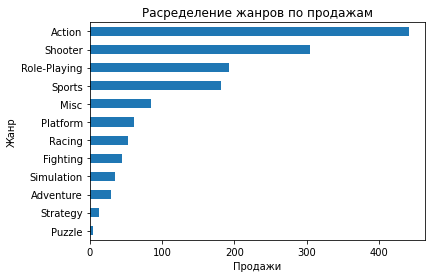

In [38]:
data_act.groupby(by='genre')['sum_sales'].sum().sort_values().plot(kind='barh', title='Расределение жанров по продажам')
plt.xlabel('Продажи')
plt.ylabel('Жанр');

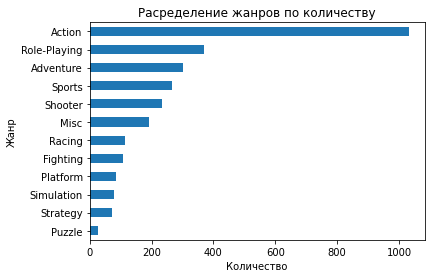

In [39]:
data_act.groupby(by='genre')['genre'].count().sort_values().plot(kind='barh', title='Расределение жанров по количеству')
plt.xlabel('Количество')
plt.ylabel('Жанр');

In [40]:
data_genre = data_act.pivot_table(index='genre', values='sum_sales', aggfunc=['sum', 'mean', 'median'])
data_genre.columns = ['sum', 'mean', 'median']
data_genre.sort_values(by='mean', ascending=False)

,sum,mean,median
genre,,,
Shooter,304.73,1.296723,0.440
Platform,61.00,0.717647,0.210
Sports,181.06,0.678127,0.240
Role-Playing,192.80,0.521081,0.140
Racing,53.50,0.465217,0.140
Misc,85.04,0.442917,0.120
Simulation,35.12,0.439000,0.120
Action,441.12,0.427856,0.120
Fighting,44.49,0.408165,0.130


***Вывод:*** Наиболее продаваемыми жанрами признаем Shooter, Platform и Sports

## Портреты пользователей по регионам

### Северная Америка (NA)

***Топ-5 платформ***

In [41]:
data_act.pivot_table(index='platform', values='na_sales', 
                     aggfunc='sum').sort_values(
                     by='na_sales', ascending=False).head(5)

,na_sales
platform,
X360,140.05
PS4,108.74
PS3,103.38
XOne,93.12
3DS,55.31


***Топ-5 жанров***

In [42]:
data_act.pivot_table(index='genre', values='na_sales', 
                     aggfunc='sum').sort_values(
                     by='na_sales', ascending=False).head(5)

,na_sales
genre,
Action,177.84
Shooter,144.77
Sports,81.53
Role-Playing,64.00
Misc,38.19


***Рейтинг ESRB***

In [43]:
data_act.pivot_table(index='rating', values='na_sales', 
                     aggfunc='sum').sort_values(
                     by='na_sales', ascending=False)

,na_sales
rating,
M,231.57
E,114.37
E10+,75.70
T,66.02


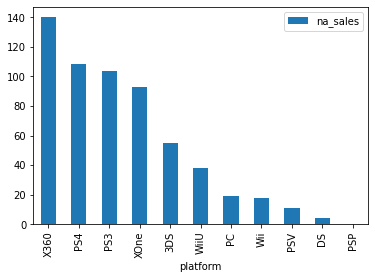

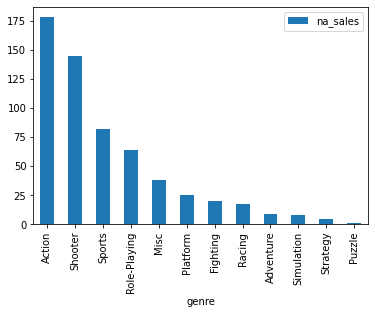

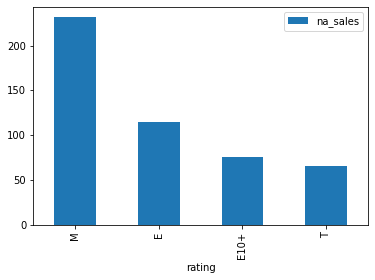

In [44]:
data_act.pivot_table(index='platform', values='na_sales', 
                     aggfunc='sum').sort_values(
                     by='na_sales', ascending=False).plot(kind='bar')

data_act.pivot_table(index='genre', values='na_sales', 
                     aggfunc='sum').sort_values(
                     by='na_sales', ascending=False).plot(kind='bar')

data_act.pivot_table(index='rating', values='na_sales', 
                     aggfunc='sum').sort_values(
                     by='na_sales', ascending=False).plot(kind='bar');

***Вывод:***
- Пятью наиболее популярными платформами стали X360, PS4, PS3, XOne, 3DS. Разница между платформами не велика.
-  В Северной америке предпочитают больше следующие жанры игр: Action, Sports, Shooter, Misc, Role-Playing. 
- По данным чаще всего играют в игры с рейтингом M(старше 17 лет) и для всех возрастных категорий. Наблюдается большой разрыв между этими категориями.

### Европа (EU)

***Топ-5 платформ***

In [45]:
data_act.pivot_table(index='platform', values='eu_sales', 
                     aggfunc='sum').sort_values(
                     by='eu_sales', ascending=False).head(5)

,eu_sales
platform,
PS4,141.09
PS3,106.85
X360,74.52
XOne,51.59
3DS,42.64


***Топ-5 жанров***

In [46]:
data_act.pivot_table(index='genre', values='eu_sales', 
                     aggfunc='sum').sort_values(
                     by='eu_sales', ascending=False).head(5)

,eu_sales
genre,
Action,159.34
Shooter,113.47
Sports,69.08
Role-Playing,48.53
Racing,27.29


***Рейтинг ESRB***

In [47]:
data_act.pivot_table(index='rating', values='eu_sales', 
                     aggfunc='sum').sort_values(
                     by='eu_sales', ascending=False)

,eu_sales
rating,
M,193.96
E,113.02
E10+,55.37
T,52.96


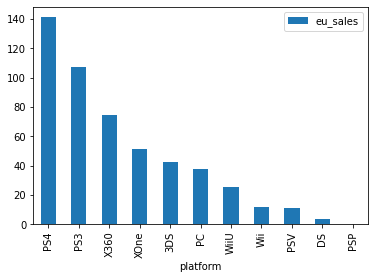

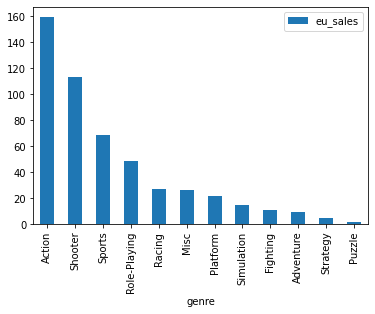

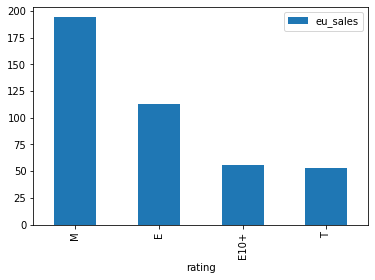

In [48]:
data_act.pivot_table(index='platform', values='eu_sales', 
                     aggfunc='sum').sort_values(
                     by='eu_sales', ascending=False).plot(kind='bar')

data_act.pivot_table(index='genre', values='eu_sales', 
                     aggfunc='sum').sort_values(
                     by='eu_sales', ascending=False).plot(kind='bar')

data_act.pivot_table(index='rating', values='eu_sales', 
                     aggfunc='sum').sort_values(
                     by='eu_sales', ascending=False).plot(kind='bar');

***Вывод:***
- Топ-5 платформ почти не изменились: PS3, X360, Wii, DS, PS4. Разрыв между ними так же не велик.
- Топ-5 жанров тоже схожи: Action, Shooter, Sports, Role-Playing, Racing
- По данным чаще всего играют в игры с рейтингом M(старше 17 лет) и для всех возрастных категорий. Наблюдается большой разрыв между этими категориями.

### Япония (JP)

***Топ-5 платформ***

In [49]:
data_act.pivot_table(index='platform', values='jp_sales', 
                     aggfunc='sum').sort_values(
                     by='jp_sales', ascending=False).head(5)

,jp_sales
platform,
3DS,87.79
PS3,35.29
PSV,21.04
PS4,15.96
WiiU,13.01


***Топ-5 жанров***

In [50]:
data_act.pivot_table(index='genre', values='jp_sales', 
                     aggfunc='sum').sort_values(
                     by='jp_sales', ascending=False).head(5)

,jp_sales
genre,
Role-Playing,65.44
Action,52.80
Misc,12.86
Simulation,10.41
Fighting,9.44


***Рейтинг ESRB***

In [51]:
data_act.pivot_table(index='rating', values='jp_sales', 
                     aggfunc='sum').sort_values(
                     by='jp_sales', ascending=False)

,jp_sales
rating,
E,28.33
T,26.02
M,21.20
E10+,8.19


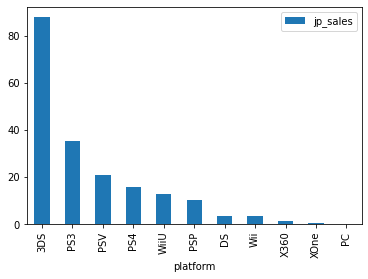

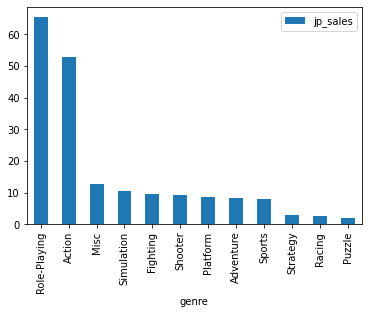

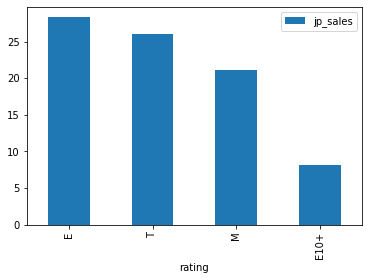

In [52]:
data_act.pivot_table(index='platform', values='jp_sales', 
                     aggfunc='sum').sort_values(
                     by='jp_sales', ascending=False).plot(kind='bar')

data_act.pivot_table(index='genre', values='jp_sales', 
                     aggfunc='sum').sort_values(
                     by='jp_sales', ascending=False).plot(kind='bar')

data_act.pivot_table(index='rating', values='jp_sales', 
                     aggfunc='sum').sort_values(
                     by='jp_sales', ascending=False).plot(kind='bar');

***Вывод:***
Здесь картина уже различается, что говорит об "особенность рынка"
- Топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU. Разрыв так же небольшой, но уже наблюдаем более скромные цифры.
- Топ-5 жанров: Role-Playing, Action, Misc, Simulation, Fighting. Невероятно, но вопреки всем экшн был смещен на второе место. Есть большой разрыв между двумя лидерами Role-Playing, Action и остальными жанрами. 
- В рейтенге здесь лидируют уже три категории E (для всех возрастных категорий), T (старше 13 лет), M (старше 17 лет).



## Статистический анализ

### Рейтинги платформ

Сформулируем нолевую гипотеху исходя из задачи, исполузя знак равенства. Так как дополнительный вводных нет, то альтернативная будет содержание обратное от нулевой, то есть неравенство:

- H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны;
- H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Для проверки гипотизы используем t-тест:

In [53]:
alpha = 0.05


data_xbox = data_act[(data_act['platform'] == 'XOne') & (data_act['user_score'] > 0)]['user_score']
data_pc = data_act[(data_act['platform'] == 'PC') & (data_act['user_score'] > 0)]['user_score']

results = st.ttest_ind(data_xbox, data_pc)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
       
print('Cредний пользовательский рейтинг Xbox One:', data_xbox.mean().round(2))
print('Cредний пользовательский рейтинг PC:', data_pc.mean().round(2))

p-значение: 0.5535080500643661
Не получилось отвергнуть нулевую гипотезу
Cредний пользовательский рейтинг Xbox One: 6.52
Cредний пользовательский рейтинг PC: 6.43


### Рейтинги жанров

В данном случае исходя из задачи так же формулируем гипотезы равности и неравности:

- H₀ - средние пользовательские рейтинги жанров Action и Sports равны;
- H₁ - средние пользовательские рейтинги жанров Action и Sports не равны.

In [54]:
alpha = 0.05


action = data_act[(data_act['genre'] == 'Action') & (data_act['user_score'] > 0)]['user_score']
sports = data_act[(data_act['genre'] == 'Sports') & (data_act['user_score'] > 0)]['user_score']

results = st.ttest_ind(action, sports)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
       
print('Cредний пользовательский рейтинг Xbox One:', action.mean().round(2))
print('Cредний пользовательский рейтинг PC:', sports.mean().round(2))

p-значение: 4.8045233804629176e-26
Отвергаем нулевую гипотезу
Cредний пользовательский рейтинг Xbox One: 6.83
Cредний пользовательский рейтинг PC: 5.46


## Вывод

### Исследовательский анализ данных

***Распределение по годам***

Наблюдается рост числа игр по мере хода времени. Резкий рост есть в 2002 году. С 2010 начинается постепенное снижение. Пики по востребованию игр находятся в 2008 и 2009 году.

***Распределение по платформам*** 

По данным за весь имеющийся период есть несколько явно лидирующих платформ, у которых с отрывом больше количество проданных копий игр:
- PS2 - 1255.77
- X360 - 971.42
- PS3 - 939.65
- Wii - 907.51
- DS - 806.12
- PS - 730.86

Лидером по продажам является PS2. За актуальный период для дальнейшего исследования возьмем период с 2013 по текущий год, так как в период в 4 года платформы идут на развитие.

Ситуация за выбранный актуальный период с 2013 года по настоящее время немного иначе, тут лидером становится PS4: 
- PS4 - 314.14
- PS3 - 288.78
- X360 - 236.54
- 3DS - 194.61
- XOne - 159.32

***Лидирующие платформы по продажам***

По сумме продаж у всех платформ имеется снижение. Потенциально прибыльной я бы назвал только PS4 и XOne, продажи велики по сравнению с другими платформами, к тому же платформа наиболее актуальная и вероятно еще начнет пользоваться популярностью.

***Глобальные продажи игр***

По графику наблюдаем, что успешее всего в продажах PS3, PS4, Wii, X360, XOne. В целом у всех платформ не лучшие реузультаты в продажах, так как так как максимум имеет большее расстояние от Q2, так же медиана расположена внизу коробки.

***Влияние отзывов на продажи***

Оценка пользователе практически не имеет влияния на продажи, тогда как оценка критиков имеет большее влияние, но тоже не столь высокое. Однако стоит заметить, что выбросы в виде более продаваемых игр находятся справой стороны, то есть имеет большую оценку, у пользователей больше 6, а у критиков больше 60. По общим данным со всеми платформам выводы соответствующие.

***Распределение игр по жанрам***

Наиболее продаваемыми жанрами признаем Shooter, Platform и Sports


### Портреты пользователей по регионам

***Северная Америка (NA)***
- Пятью наиболее популярными платформами стали X360, PS4, PS3, XOne, 3DS. Разница между платформами не велика.
-  В Северной америке предпочитают больше следующие жанры игр: Action, Sports, Shooter, Misc, Role-Playing. 
- По данным чаще всего играют в игры с рейтингом M(старше 17 лет) и для всех возрастных категорий. Наблюдается большой разрыв между этими категориями.

Если взять среднестатистического игрока, то ему будут присущи следующие факты:
- Использует X360
- Любимым жанром является Action
- Играет в игры, которые подходят для всех возрастных категорий (E) или более 17 лет (M)

***Европа (EU)***

- Топ-5 платформ почти не изменились: PS3, X360, Wii, DS, PS4. Разрыв между ними так же не велик.
- Топ-5 жанров тоже схожи: Action, Shooter, Sports, Role-Playing, Racing
- По данным чаще всего играют в игры с рейтингом M(старше 17 лет) и для всех возрастных категорий. Наблюдается большой разрыв между этими категориями.

Стандартный пользователь:
- Использует PS3
- Любимым жанром является Action
- Играет в игры, которые подходят для всех возрастных категорий (E) или более 17 лет (M) 

***Япония (JP)***

Здесь картина уже различается, что говорит об "особенность рынка"
- Топ-5 платформ: 3DS, PS3, PSV, PS4, WiiU. Разрыв так же небольшой, но уже наблюдаем более скромные цифры.
- Топ-5 жанров: Role-Playing, Action, Misc, Simulation, Fighting. Невероятно, но вопреки всем экшн был смещен на второе место. Есть большой разрыв между двумя лидерами Role-Playing, Action и остальными жанрами. 
- В рейтенге здесь лидируют уже три категории E (для всех возрастных категорий), T (старше 13 лет), M (старше 17 лет).

Стандартный пользователь:

- Использует 3DS 
- Любимым жанром является Role-Playing
- Играет в игры, которые подходят для всех возрастных категорий (E), старше 13 (T) или 17 лет (M)


### Статистический анализ

Проверили следующие гипотезы:

- H₀ - средние пользовательские рейтинги платформ Xbox One и PC равны;
- H₁ - средние пользовательские рейтинги платформ Xbox One и PC не равны.

Нулевую гипотезу отвергнуть не получилось, средние пользовательские рейтинги почти равны. 

И

- H₀ - средние пользовательские рейтинги жанров Action и Sports равны;
- H₁ - средние пользовательские рейтинги жанров Action и Sports не равны.

Нулевая гипотеза отвергнута, средние пользовательские рейтинги не равны.


### Итоги

Общими ориентирами для рекламных компаний следует взять платформы PS4, XOne.

Для получения наибольших продаж следует ориентировать производство на жанры Shooter, Platform и Sports.

Не следует при анализе придавать большое значение оценкам критиков и тем более пользователей, они практически не влияют на продажи. 

При всем этом обязательно следует учитывать информацию о различиях между регионами и создавать кампании учитывая все особенности, наиболее специфичной и отклоняющейся является Япония. 

Так же следует провести дополнительное исследование с информацией по доходу от продаж игр, количество проданных копий может свидетельствовать только о популярности той или иной игры, однако полезно знать за что пользователи готовы платить больше.
